In [1]:
import cv2,os
import numpy as np
import csv
import glob
import matplotlib.pyplot as plot


In [8]:
label = "Parasitized"
dirList = glob.glob("C:/Users/HIBA/OneDrive/Desktop/university/cell_images"+label+"/*.png")
file = open("C:/Users/raman/OneDrive/Desktop/d1.csv","a")
for img_path in dirList:

	im = cv2.imread(img_path)
	
	im = cv2.GaussianBlur(im,(5,5),2)



	im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

	ret,thresh = cv2.threshold(im_gray,127,255,0)
	contours,_ = cv2.findContours(thresh,1,2)
	
	for contour in contours:
		cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
	

	cv2.imshow("window",im_gray)

	break


	file.write(label)
	file.write(",")

	for i in range(5):
		try:
			area = cv2.contourArea(contours[i])
			file.write(str(area))
		except:
			file.write("0")

		file.write(",")

	
	file.write("\n")
cv2.waitKey(19000)



-1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
import joblib

##Step1: Load Dataset



In [3]:
dataframe = pd.read_csv("C:/Users/HIBA/OneDrive/Desktop/d1.csv")
#print(dataframe.head())

#Step2: Split into training and test data
x = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##Step4: Build a model

model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
joblib.dump(model,"rf_malaria_100_5")


##Step5: Make predictions and get classification report

predictions = model.predict(x_test)

print(metrics.classification_report(predictions,y_test))
print(model.score(x_test,y_test))


              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2772
  Uninfected       0.90      0.89      0.90      2740

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.8985849056603774


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=31)

In [5]:
from sklearn.preprocessing import StandardScaler


# Create an instance of the scaler and apply it to the data


sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = LogReg_clf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score


acc =  accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


print(acc)

print(cm)

0.8904208998548622
[[1815  227]
 [ 226 1866]]


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE=[224,224]
train_path='C:/Users/HIBA/OneDrive/Desktop/Dataset/Train'
test_path='C:/Users/HIBA/OneDrive/Desktop/Dataset/Test'

In [15]:
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [16]:
for layers in vgg.layers:
    layers.trainable=False
#now using glob gor getting number of classes to predicted with the help of folder
folder=glob('C:/Users/HIBA/OneDrive/Desktop/Dataset/Train/*')

In [17]:
from tensorflow.keras.layers import Flatten

In [18]:
x=Flatten()(vgg.output)

In [19]:
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [12]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(r'C:/Users/HIBA/OneDrive/Desktop/Dataset/Train',
                                              target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory(r'C:/Users/HIBA/OneDrive/Desktop/Dataset/Test',
                                         target_size=(224,224),batch_size=32,class_mode='categorical')

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [51]:
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('C:/Users/HIBA/OneDrive/Desktop/Dataset/Train',
                                              target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('C:/Users/HIBA/OneDrive/Desktop/Dataset/Test',
                                         target_size=(224,224),batch_size=32,class_mode='categorical')

In [15]:
raman=model.fit_generator(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\raman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 117s 9s/step - loss: 1.5391 - accuracy: 0.6014 - val_loss: 0.6567 - val_accuracy: 0.6716
Epoch 2/20
13/13 [==============================] - 121s 9s/step - loss: 0.7072 - accuracy: 0.6684 - val_loss: 0.6574 - val_accuracy: 0.6716
Epoch 3/20
13/13 [==============================] - 120s 9s/step - loss: 0.4569 - accuracy: 0.7503 - val_loss: 0.4737 - val_accuracy: 0.7239
Epoch 4/20
13/13 [==============================] - 122s 10s/step - loss: 0.3423 - accuracy: 0.8549 - val_loss: 0.4725 - val_accuracy: 0.7612
Epoch 5/20
13/13 [==============================] - 123s 10s/step - loss: 0.3611 - accuracy: 0.8437 - val_loss: 0.6120 - val_accuracy: 0.7015
Epoch 6/20
13/13 [==============================] - 124s 10s/step - loss: 0.3727 - accuracy: 0.8319 - val_loss: 0.3849 - val_accuracy: 0.7985
Epoch 7/20
13/13 [==============================] - 120s 9s/step - loss: 0.2827 - accuracy: 0.8905 - val_loss: 0.4339 - val_accuracy: 0.7836
Epoch 8/20

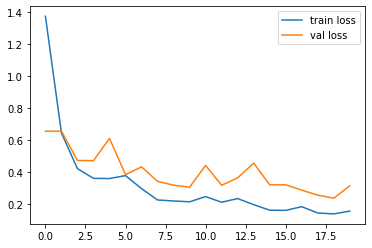

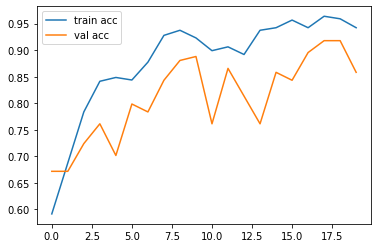

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(raman.history['loss'], label='train loss')
plt.plot(raman.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(raman.history['accuracy'], label='train acc')
plt.plot(raman.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('pc_model_vgg19.h5')


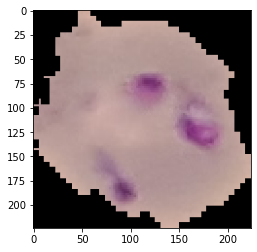

In [233]:
x,y = test_set.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

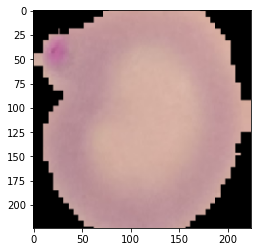

In [235]:
x,y = training_set.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [14]:
from tensorflow.keras.models import load_model
model=load_model('model_vgg19.h5')
y_pred=model.predict(test_set)
print(y_pred)

[[2.34840065e-01 7.65159965e-01]
 [9.99336302e-01 6.63684041e-04]
 [9.96539831e-01 3.46016977e-03]
 [9.98329937e-01 1.67010387e-03]
 [9.99126613e-01 8.73412180e-04]
 [9.25887167e-01 7.41128176e-02]
 [9.99953151e-01 4.68063772e-05]
 [6.68362975e-01 3.31637084e-01]
 [9.97021735e-01 2.97827297e-03]
 [8.63832653e-01 1.36167303e-01]
 [1.90656036e-01 8.09343934e-01]
 [8.10076296e-01 1.89923689e-01]
 [3.57342884e-02 9.64265645e-01]
 [1.64807618e-01 8.35192382e-01]
 [8.59561384e-01 1.40438691e-01]
 [9.63913560e-01 3.60864289e-02]
 [8.27305079e-01 1.72694892e-01]
 [7.63976574e-02 9.23602343e-01]
 [9.98799324e-01 1.20071392e-03]
 [7.88218677e-01 2.11781323e-01]
 [1.15393281e-01 8.84606719e-01]
 [9.99796093e-01 2.03962045e-04]
 [3.18095833e-01 6.81904197e-01]
 [4.10858542e-01 5.89141428e-01]
 [5.42866468e-01 4.57133502e-01]
 [9.05407429e-01 9.45926011e-02]
 [1.80584729e-01 8.19415271e-01]
 [7.22313702e-01 2.77686357e-01]
 [3.11334699e-01 6.88665330e-01]
 [9.99995589e-01 4.45602109e-06]
 [9.993106

In [15]:
y_pred=model.predict(training_set)
y_pred

array([[3.31442088e-01, 6.68557882e-01],
       [4.75825779e-02, 9.52417433e-01],
       [9.99738157e-01, 2.61776673e-04],
       [7.34232366e-01, 2.65767634e-01],
       [1.30529940e-01, 8.69470060e-01],
       [2.16837287e-01, 7.83162713e-01],
       [9.99619842e-01, 3.80074343e-04],
       [3.48637626e-02, 9.65136230e-01],
       [1.52060136e-01, 8.47939849e-01],
       [9.92206156e-01, 7.79378135e-03],
       [2.15491727e-01, 7.84508288e-01],
       [9.99944091e-01, 5.59417094e-05],
       [2.50607789e-01, 7.49392211e-01],
       [2.30343550e-01, 7.69656420e-01],
       [9.95074451e-01, 4.92556207e-03],
       [9.62652743e-01, 3.73472497e-02],
       [1.00000000e+00, 9.77523840e-10],
       [2.65557587e-01, 7.34442472e-01],
       [5.38976431e-01, 4.61023569e-01],
       [6.71470463e-02, 9.32852924e-01],
       [1.30425572e-01, 8.69574428e-01],
       [9.99961853e-01, 3.81934733e-05],
       [3.43641639e-01, 6.56358361e-01],
       [1.65047511e-01, 8.34952474e-01],
       [8.067893

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


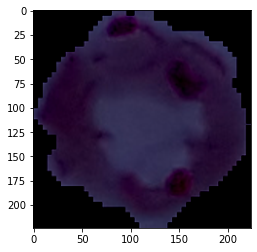

In [17]:
#from tensorflow.keras.preprocessing import image
#img=image.load_img('C:/Users/HIBA/OneDrive/Desktop/Dataset/Test/Uninfected/2.png',target_size=(224,224))
#plt.imshow(img)
from numpy import asarray
from PIL import Image

# load image
image = Image.open('C:/Users/HIBA/OneDrive/Desktop/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png')
newsize = (224, 224) 
image = image.resize(newsize)
pic = asarray(image)
# convert from integers to floats
pic = pic.astype('float32')
# normalize to the range 0-1


pic=np.expand_dims(pic,axis=0)
pic=preprocess_input(pic)
pic=pic/255.0
plt.imshow(pic.reshape([224,224,3]))
plt.show() 

In [269]:
'''from tensorflow.keras.applications.vgg19 import preprocess_input
x=image.img_to_array(img)
x = x.astype('float32') 
x /= 255.0 
img_data=preprocess_input(x)
x=np.expand_dims(x,axis=0)
#print(img_data)
img_data.shape'''

(224, 224, 3)

In [18]:
a=max(model.predict(pic))
print(a)
if(a[0]>0 and a[0]<0.1):
    print("The person is not infected")
elif(a[0]>0.1 and a[0]<0.4):
    print("The person is having mild fever and should take precautions")
elif(a[0]>0.5 and a[0]<0.7):
    print("Person can have malaria and should go for initial precautions and medicines")
else:
    print("Person is having malaria and immediate medication should be done")
    

[9.9999976e-01 2.4929278e-07]
Person is having malaria and immediate medication should be done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


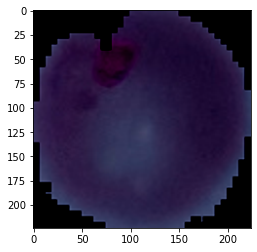

In [23]:
image2 = Image.open('C:/Users/HIBA/OneDrive/Desktop/Dataset/Train/Parasite/C33P1thinF_IMG_20150619_121229a_cell_179.png')
#C:/Users/raman/OneDrive/Desktop/Dataset/Train/Parasite/C33P1thinF_IMG_20150619_121229a_cell_179.png
newsize = (224, 224) 
image2 = image2.resize(newsize)
pic2 = asarray(image2)
# convert from integers to floats
pic2 = pic2.astype('float32')
# normalize to the range 0-1


pic2=np.expand_dims(pic2,axis=0)
pic2=preprocess_input(pic2)
pic2=pic2/255.0
plt.imshow(pic2.reshape([224,224,3]))
plt.show() 

In [264]:
'''from tensorflow.keras.applications.vgg19 import preprocess_input
x2=image.img_to_array(imgi)
x2=x2/255.0
x2=np.expand_dims(x2,axis=0)
img2_data=preprocess_input(x2)
#print(img_data)
img2_data.shape'''

(1, 224, 224, 3)

In [24]:
model.predict(pic2)

array([[0.4730084, 0.5269916]], dtype=float32)

In [27]:
a1=max(model.predict(pic2))
print(a1)
if(a1[0]>0 and a1[0]<0.1):
    print("The person is not infected")
elif(a1[0]>0.1 and a1[0]<0.5):
    print("The person is having mild fever and should take precautions")
elif(a1[0]>0.5 and a1[0]<0.7):
    print("Person can have malaria and should go for initial precautions and medicines")
else:
    print("Person is having malaria and immediate medication should be done")
    

[0.4730084 0.5269916]
The person is having mild fever and should take precautions


In [23]:
import tensorflow
from PIL import Image
res_model=tensorflow.keras.applications.ResNet50V2(include_top=False,weights="imagenet",input_shape=IMAGE_SIZE+[3])

In [24]:
for layers in res_model.layers:
    layers.trainable=False

In [25]:
x=Flatten()(res_model.output)
predict=Dense(len(folder),activation='softmax')(x)
RES52=Model(inputs=res_model.input,outputs=predict)
RES52.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [26]:
RES52.compile(
       loss='categorical_crossentropy',
       optimizer='adam',
       metrics=['accuracy'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [28]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [29]:
resne52=RES52.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\HIBA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
13/13 [==============================] - 34s 2s/step - loss: 7.6202 - accuracy: 0.5992 - val_loss: 1.8655 - val_accuracy: 0.9104
Epoch 2/10
13/13 [==============================] - 34s 3s/step - loss: 1.7959 - accuracy: 0.9043 - val_loss: 0.7666 - val_accuracy: 0.9328
Epoch 3/10
13/13 [==============================] - 32s 3s/step - loss: 0.9571 - accuracy: 0.9405 - val_loss: 0.6226 - val_accuracy: 0.9403
Epoch 4/10
13/13 [==============================] - 32s 3s/step - loss: 0.7304 - accuracy: 0.9500 - val_loss: 0.9898 - val_accuracy: 0.9328
Epoch 5/10
13/13 [==============================] - 32s 3s/step - loss: 0.3936 - accuracy: 0.9666 - val_loss: 0.1598 - val_accuracy: 0.9701
Epoch 6/10
13/13 [==============================] - 32s 3s/step - loss: 0.0818 - accuracy: 0.9861 - val_loss: 0.0809 - val_accuracy: 0.9701
Epoch 7/10
13/13 [==============================] - 32s 2s/step - loss: 0.2510 - accuracy: 0.9826 - val_loss: 0.0459 - val_accuracy: 0.9776
Epoch 8/10
13/13 [==

In [30]:
from tensorflow.keras.models import load_model

model.save('HIBA_model_resne52.h5')

In [28]:
from tensorflow.keras.models import load_model
model1=load_model('model_resne52.h5')

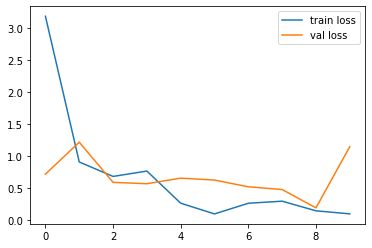

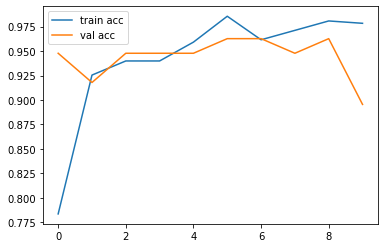

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(resne52.history['loss'], label='train loss')
plt.plot(resne52.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(resne52.history['accuracy'], label='train acc')
plt.plot(resne52.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
from tensorflow.keras.preprocessing import image
img1=image.load_img('C:/Users/HIBA/OneDrive/Desktop/Dataset/Train/Uninfected/un.png',target_size=(224,224))

In [30]:
y_pred=model1.predict(test_set)
print(y_pred)

[[8.59561384e-01 1.40438691e-01]
 [9.99162793e-01 8.37188039e-04]
 [8.58370587e-02 9.14162934e-01]
 [9.99953151e-01 4.68063772e-05]
 [9.48164523e-01 5.18354066e-02]
 [7.33549669e-02 9.26645041e-01]
 [9.96539831e-01 3.46016977e-03]
 [8.10076296e-01 1.89923689e-01]
 [9.99046981e-01 9.53003124e-04]
 [8.44530404e-01 1.55469611e-01]
 [9.97402310e-01 2.59777205e-03]
 [1.80584729e-01 8.19415271e-01]
 [9.97693717e-01 2.30624736e-03]
 [8.27305079e-01 1.72694892e-01]
 [9.84003127e-01 1.59968548e-02]
 [9.99336302e-01 6.63684041e-04]
 [9.92393851e-01 7.60619761e-03]
 [1.92266718e-01 8.07733238e-01]
 [9.99310613e-01 6.89428882e-04]
 [1.90139353e-01 8.09860647e-01]
 [9.99920964e-01 7.90181439e-05]
 [1.52967826e-01 8.47032130e-01]
 [9.71169889e-01 2.88301334e-02]
 [1.90656036e-01 8.09343934e-01]
 [9.99126613e-01 8.73412180e-04]
 [9.46606994e-02 9.05339301e-01]
 [1.64807618e-01 8.35192382e-01]
 [9.99994993e-01 5.01783506e-06]
 [3.31574827e-01 6.68425202e-01]
 [9.77558434e-01 2.24415436e-02]
 [9.309947

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


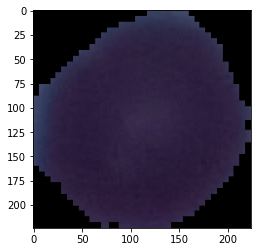

In [31]:
from tensorflow.keras.applications.resnet50 import preprocess_input
x1=image.img_to_array(img1)
x1=np.expand_dims(x1,axis=0)
img1_data=preprocess_input(x1)
img1_data=img1_data/255.0
model1.predict(img1_data)
plt.imshow(img1_data.reshape([224,224,3]))

In [32]:
a2=max(model1.predict(img1_data)) #a[0] when max then parasitic
print(a2)
if(a2[0]>0 and a2[0]<0.1):
    print("The person is not infected")
elif(a2[0]>0.1 and a2[0]<0.4):
    print("The person is having mild fever and should take precautions")
elif(a2[0]>0.5 and a2[0]<0.7):
    print("Person can have malaria and should go for initial precautions and medicines")
else:
    print("Person is having malaria and immediate medication should be done")
    

[0.02597366 0.9740263 ]
The person is not infected


In [306]:
img2=image.load_img('C:/Users/HIBA/OneDrive/Desktop/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_20.png',target_size=(224,224))


In [314]:
from tensorflow.keras.applications.resnet import preprocess_input
img2=image.img_to_array(img2)
#print(x)
img2=np.expand_dims(img2,axis=0)
img2_data=preprocess_input(img2)
img2_data=img2_data/255.0
img2_data.shape

(1, 224, 224, 3)

In [315]:
prediction=model1.predict(img2_data)
prediction

array([[0.96701753, 0.03298249]], dtype=float32)

[0.03481342 0.96518654]


Not Infected
